# Radar Chart for CV

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from gspread_dataframe import get_as_dataframe
import numpy as np

## Funkcje

In [40]:
def Likter2Int(odp):
    try:
        likter = ['Zdecydowanie się nie zgadzam.','Nie zgadzam się.', 
                  'Nie wiem.','Zgadzam się.','Zdecydowanie się zgadzam.']
        return likter.index(odp) - 2
    except:
        return odp

def read_odp_matrix(csv_path):
    pkt = pd.read_csv(csv_path,sep=';')
    return pkt.to_numpy()
 
def get_scores(a,p_matrix, position=0):
    matrix= np.zeros(6)
    position = -1
    for idx in range(62):
        vec =  a.iloc[position, idx+1] * p_matrix[idx][1:] #0 to nr wiersza (chyba) // position 
        matrix = np.vstack([matrix, vec])

    matrix = matrix[1:]
    score = pd.DataFrame(matrix)

    scores = [score[0].sum().item(), #komunikatywnosc
        score[1].sum().item(), #opanowanie
        score[2].sum().item(), #ambicje
        score[3].sum().item(), #organizacja
        score[4].sum().item(), #introwertyzm / ekstrawertyzm
        score[5].sum().item()  #kreatywnosc
             ]

    #scores = [x * 3 for x in scores]
    return scores

    
def DrawChart(scores):
    df = pd.DataFrame({
    'group': ['A'],
    'KMT': [scores[0]],
    'OPN': [scores[1]],
    'AMB': [scores[2]],
    'ORGN': [scores[3]],
    'EKST': [scores[4]],
    'KREA':[scores[5]],
    })
    
    test_num = 0
    categories=list(df)[1:]
    print(categories)
    N = len(categories)
    values=df.loc[test_num].drop('group').values.flatten().tolist()
    values += values[:1]
    #print(values)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)
    
    return ax

['KMT', 'OPN', 'AMB', 'ORGN', 'EKST', 'KREA']


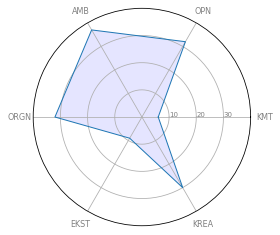

In [42]:
#autoryzacja z google docs
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('cred.json', scope)
gc = gspread.authorize(credentials)

#wyciagniecie danych z arkusza -> dataframe
worksheet = gc.open("Pytania (Odpowiedzi)").sheet1
df = get_as_dataframe(worksheet, parse_dates=True)
df = df.dropna(how='all')

#mapowanie danych z formularza -> dataframe
a=df.applymap(Likter2Int)

#wczytanie macierzy punktowania
p_matrix = read_odp_matrix('punktowanie_v2-zera.csv')

#wektor skilli
scores = get_scores(a,p_matrix)
scores = [sc + 20 for sc in scores]
#scores = [ 10, 10 , 10, 10, 10, 10]
DrawChart(scores)

In [ ]:
#DOKUMENTACJA
# https://docs.google.com/document/d/19PnmoWs5zklTfNQZJ4YUedgYB0Crig7MjMuXxU5ptQg/edit?ts=5e08fa83

## Notes

In [ ]:
#a.loc[0][0]
#p_matrix
# p_matrix[59][1:]
# a.loc[0][60:]